In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline 

In [2]:
train = pd.read_csv("./input/train.csv")
train.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,...,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,...,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,...,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


In [3]:
test = pd.read_csv('./input/test.csv')
test.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
0,0,6,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2.0,Real Bed,2.0,2.0,strict,Boston,t,...,42.359278,-71.069962,Gorgeous 2BR/2BA Duplex in Beacon Hill,Beacon Hill,58,House,90.0,Entire home/apt,https://a0.muscache.com/im/pictures/7e4808b4-5...,02114
1,1,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,moderate,LA,t,...,34.084747,-118.367355,Luxury 1 Bedroom West Hollywood City Center,West Hollywood,4,Guesthouse,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/5392fbd6-6...,90046
2,2,2,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1.0,Real Bed,0.0,1.0,flexible,NYC,f,...,40.720541,-73.959192,Bedroom with Patio in Prime Williamsburg Locat...,Williamsburg,0,Apartment,NaN,Private room,https://a0.muscache.com/im/pictures/544d3b89-d...,11249.0
3,3,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,2.0,strict,NYC,f,...,40.681117,-73.944091,Cozy apartment in Brooklyn,Bedford-Stuyvesant,0,Apartment,NaN,Entire home/apt,https://a0.muscache.com/im/pictures/26baf7ba-0...,11216
4,4,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.5,Real Bed,1.0,2.0,strict,LA,t,...,34.150995,-118.409359,"Cozy, sunny, pet friendly loft/apt",NaN,6,Loft,92.0,Entire home/apt,https://a0.muscache.com/im/pictures/86107545/9...,91604


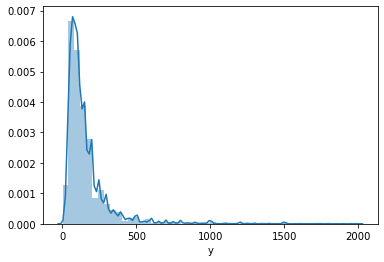

In [4]:
sns.distplot(train['y'])

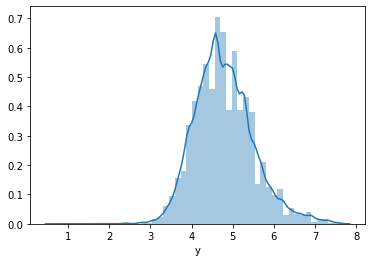

In [5]:
train["y"] = np.log1p(train["y"])
sns.distplot(train['y'])

In [6]:
# IDは別でおいとく
train_ID = train['id']
test_ID = test['id']

train.drop("id", axis = 1, inplace = True)
test.drop("id", axis = 1, inplace = True)

In [7]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.y.values
y_train

array([4.93447393, 3.76120012, 4.18965474, ..., 4.61512052, 3.66356165,
       3.93182563])

In [8]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['y'], axis=1, inplace=True)
all_data

,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,...,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,My place is meant for family and a few friends...,...,33.788931,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804
1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,...,38.934810,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018
2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,We're looking forward to your stay at our apt....,...,40.695118,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,...,37.796728,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133
4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,...,40.785050,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,2.0,2.0,strict,NYC,t,"The Greenhouse, located on Green Street, is a ...",...,40.734555,-73.954892,Spacious 2BR Greenpoint Getaway,Greenpoint,0,Apartment,NaN,Entire home/apt,https://a0.muscache.com/im/pictures/57338613/6...,11222
74107,2,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1.0,Real Bed,2.0,1.0,flexible,Chicago,f,"Two bedroom, one bathroom with large dining/li...",...,41.945939,-87.672018,Walk up Apartment in Lakeview/Wrigleyville,Lakeview,9,Apartment,90.0,Entire home/apt,NaN,60657
74108,5,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1.5,Real Bed,2.0,2.0,flexible,Chicago,t,Happy Holidays! If you're looking for a big op...,...,41.933123,-87.708087,Beautiful Logan Square Home,Avondale,0,House,NaN,Entire home/apt,https://a0.muscache.com/im/pictures/361642af-e...,60618
74109,2,"{Internet,""Wireless Internet"",""Air conditionin...",1.0,Real Bed,1.0,2.0,strict,NYC,t,This is a cozy one-bedroom apartment a few blo...,...,40.788702,-73.947358,Charming 1 BR apartment east of Central Park,East Harlem,4,Apartment,95.0,Entire home/apt,https://a0.muscache.com/im/pictures/49c8e83f-d...,10029.0


In [9]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
pd.DataFrame({'欠損率' :all_data_na})

,欠損率
host_response_rate,24.691341
review_scores_rating,22.563452
first_review,21.405729
last_review,21.355804
thumbnail_url,11.086074
neighbourhood,9.272578
zipcode,1.303450
bathrooms,0.269865
host_since,0.253674
host_identity_verified,0.253674


In [10]:
# host_response_rate ホストの返却率を0埋め
all_data['host_response_rate'] = all_data['host_response_rate'].str.rstrip('%').astype('float')/100.0
all_data['host_response_rate'] = all_data['host_response_rate'].fillna(0)

In [11]:
all_data['bathrooms'] = all_data['bathrooms'].fillna(1.0)
all_data['bedrooms'] = all_data['bedrooms'].fillna(1.0)
all_data['beds'] = all_data['beds'].fillna(1.0)

In [12]:
all_data['host_has_profile_pic'] = all_data['host_has_profile_pic'].fillna('f')
all_data['host_identity_verified'] = all_data['host_identity_verified'].fillna('f')

In [13]:
all_data['review_scores_rating'] = all_data['review_scores_rating'].fillna(all_data['review_scores_rating'].median()).astype('float')
all_data['review_scores_rating']

0         60.0
1        100.0
2         83.0
3         95.0
4        100.0
         ...  
74106     96.0
74107     90.0
74108     96.0
74109     95.0
74110     97.0
Name: review_scores_rating, Length: 74111, dtype: float64

In [14]:
all_data['host_since'] = all_data['host_since'].fillna('')

def fill_host_since(x):
    if x['host_since'] == '':
        x['host_since'] = x["first_review"]
    return x

all_data = all_data.apply(fill_host_since, axis=1)
all_data.drop("first_review", axis = 1, inplace = True)
all_data.drop("last_review", axis = 1, inplace = True)

In [15]:
all_data.drop("name", axis = 1, inplace = True)

In [16]:
all_data.drop("description", axis = 1, inplace = True)


In [17]:
all_data['pool'] = all_data['amenities'].apply(lambda x: 'pool' in x.lower()).astype(str)
all_data['tv'] = all_data['amenities'].apply(lambda x: 'tv' in x.lower()).astype(str)
all_data['kitchen'] = all_data['amenities'].apply(lambda x: 'kitchen' in x.lower()).astype(str)
all_data['pet_live'] = all_data['amenities'].apply(lambda x: 'pets live on' in x.lower()).astype(str)
all_data['pet_allow'] = all_data['amenities'].apply(lambda x: 'pets allow' in x.lower()).astype(str)
all_data['gym'] = all_data['amenities'].apply(lambda x: 'gym' in x.lower()).astype(str)
all_data['elevator'] = all_data['amenities'].apply(lambda x: 'elevator' in x.lower()).astype(str)
all_data['family'] = all_data['amenities'].apply(lambda x: 'family/kid' in x.lower()).astype(str)

all_data['amenities'] = all_data['amenities'].apply(lambda x: len(x.split(',')))
all_data['amenities']

0         7
1        22
2        29
3        18
4        18
         ..
74106    10
74107    15
74108    18
74109    14
74110     7
Name: amenities, Length: 74111, dtype: int64

In [18]:
# サムネイルがあるかどうか
all_data['thumbnail_url'] = all_data['thumbnail_url'].isnull().astype(str)

In [19]:
all_data.dtypes

accommodates                int64
amenities                   int64
bathrooms                 float64
bed_type                   object
bedrooms                  float64
beds                      float64
cancellation_policy        object
city                       object
cleaning_fee               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate        float64
host_since                 object
instant_bookable           object
latitude                  float64
longitude                 float64
neighbourhood              object
number_of_reviews           int64
property_type              object
review_scores_rating      float64
room_type                  object
thumbnail_url              object
zipcode                    object
pool                       object
tv                         object
kitchen                    object
pet_live                   object
pet_allow                  object
gym                        object
elevator      

In [20]:
all_data['zipcode']= all_data['zipcode'].fillna('')
all_data['neighbourhood']= all_data['neighbourhood'].fillna('')

def remove(x):
    x = list(x)
    for i in x:
        if i != '':
            return i
    return ''

zipcode_set = all_data.groupby('zipcode')['neighbourhood'].apply(remove)
neighbourhood_set = all_data.groupby('neighbourhood')['zipcode'].apply(remove)

def convert(x):
    if x['zipcode'] == '':
        x['zipcode'] = neighbourhood_set.loc[x['neighbourhood']]
        return x
    elif x['neighbourhood'] == '':
        x['neighbourhood'] = zipcode_set.loc[x['zipcode']]
        return x
    else:
        return x
all_data = all_data.apply(convert, axis=1)

In [21]:
all_data = all_data.replace(r'^\s*$', np.nan, regex=True)

In [22]:
all_data['zipcode'] = all_data['zipcode'].fillna('0000')
all_data['neighbourhood']= all_data['neighbourhood'].fillna('')

In [23]:
all_data['head_zipcode']= all_data['zipcode'].astype(str).apply(lambda x: x[:5])

In [24]:
all_data['host_since']= all_data['host_since'].fillna('2014-01-01')
import datetime as dt 
all_data['host_since'] = pd.to_datetime(all_data['host_since']) 
all_data['host_since']=all_data['host_since'].map(dt.datetime.toordinal)

In [25]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
pd.DataFrame({'欠損率' :all_data_na})

,欠損率


In [26]:
all_data.isnull().sum().sort_values()

accommodates              0
gym                       0
pet_allow                 0
pet_live                  0
kitchen                   0
tv                        0
pool                      0
zipcode                   0
thumbnail_url             0
room_type                 0
review_scores_rating      0
property_type             0
number_of_reviews         0
neighbourhood             0
elevator                  0
longitude                 0
instant_bookable          0
host_since                0
host_response_rate        0
host_identity_verified    0
host_has_profile_pic      0
cleaning_fee              0
city                      0
cancellation_policy       0
beds                      0
bedrooms                  0
bed_type                  0
bathrooms                 0
amenities                 0
latitude                  0
family                    0
dtype: int64

In [27]:
corrmat = train.corr()
corrmat

,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
accommodates,1.000000,0.502278,0.708510,0.806654,-0.079395,-0.086365,0.042320,-0.017824,0.570799
bathrooms,0.502278,1.000000,0.586366,0.524847,-0.135427,-0.132046,-0.040262,0.006698,0.353749
bedrooms,0.708510,0.586366,1.000000,0.708230,-0.057502,-0.074027,-0.033761,0.009996,0.475409
beds,0.806654,0.524847,0.708230,1.000000,-0.080307,-0.082434,0.030914,-0.027839,0.445190
latitude,-0.079395,-0.135427,-0.057502,-0.080307,1.000000,0.896581,-0.016439,-0.035133,0.000583
longitude,-0.086365,-0.132046,-0.074027,-0.082434,0.896581,1.000000,-0.048660,-0.050019,-0.045675
number_of_reviews,0.042320,-0.040262,-0.033761,0.030914,-0.016439,-0.048660,1.000000,0.012144,-0.030495
review_scores_rating,-0.017824,0.006698,0.009996,-0.027839,-0.035133,-0.050019,0.012144,1.000000,0.090537
y,0.570799,0.353749,0.475409,0.445190,0.000583,-0.045675,-0.030495,0.090537,1.000000


In [28]:
cols = corrmat.nlargest(10, 'y')['y']
cols


y                       1.000000
accommodates            0.570799
bedrooms                0.475409
beds                    0.445190
bathrooms               0.353749
review_scores_rating    0.090537
latitude                0.000583
number_of_reviews      -0.030495
longitude              -0.045675
Name: y, dtype: float64

In [29]:
cols = corrmat.nsmallest(10, 'y')['y']
cols

longitude              -0.045675
number_of_reviews      -0.030495
latitude                0.000583
review_scores_rating    0.090537
bathrooms               0.353749
beds                    0.445190
bedrooms                0.475409
accommodates            0.570799
y                       1.000000
Name: y, dtype: float64

In [30]:
from sklearn.preprocessing import LabelEncoder
import pandas.api.types as ptypes

# ラベルEncodingで与えられる数値の順番って
for i in ['bed_type','cancellation_policy','cleaning_fee', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'property_type', 'room_type', 'city', 'thumbnail_url', 'pool', 'tv', 'kitchen', 'pet_live', 'pet_allow', 'gym', 'elevator', 'family', 'head_zipcode']:
    if ptypes.is_string_dtype(all_data[i].dtypes):
        le = LabelEncoder()
        all_data[i] = all_data[i].fillna('None')
        le.fit(all_data[i].values)
        all_data[i] = le.transform(all_data[i].values)
all_data

,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,...,thumbnail_url,zipcode,pool,tv,kitchen,pet_live,pet_allow,gym,elevator,family
0,6,7,2.0,4,1.0,4.0,0,3,1,1,...,1,90804,0,1,1,0,0,0,0,0
1,2,22,1.0,4,1.0,1.0,2,2,1,1,...,0,20018,0,1,1,0,0,0,0,0
2,2,29,2.0,4,1.0,1.0,2,4,1,1,...,0,11221,0,1,1,0,0,0,0,0
3,2,18,1.0,4,1.0,1.0,2,5,1,1,...,1,94133,0,1,1,0,0,0,0,0
4,2,18,1.0,4,1.0,1.0,2,4,1,1,...,0,10024,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4,10,1.0,4,2.0,2.0,2,4,1,1,...,0,11222,0,1,1,0,0,0,0,1
74107,2,15,1.0,4,2.0,1.0,0,1,0,1,...,1,60657,0,1,1,0,0,0,0,1
74108,5,18,1.5,4,2.0,2.0,0,1,1,1,...,0,60618,0,1,1,0,0,0,0,1
74109,2,14,1.0,4,1.0,2.0,2,4,1,1,...,0,10029.0,0,0,1,0,0,0,0,1


In [31]:
all_data.drop("zipcode", axis = 1, inplace = True)
all_data.drop("neighbourhood", axis = 1, inplace = True)

In [32]:
all_data.dtypes

accommodates                int64
amenities                   int64
bathrooms                 float64
bed_type                    int64
bedrooms                  float64
beds                      float64
cancellation_policy         int64
city                        int64
cleaning_fee                int64
host_has_profile_pic        int64
host_identity_verified      int64
host_response_rate        float64
host_since                  int64
instant_bookable            int64
latitude                  float64
longitude                 float64
number_of_reviews           int64
property_type               int64
review_scores_rating      float64
room_type                   int64
thumbnail_url               int64
pool                        int64
tv                          int64
kitchen                     int64
pet_live                    int64
pet_allow                   int64
gym                         int64
elevator                    int64
family                      int64
dtype: object

In [33]:
# データを元に戻す
train = all_data[:ntrain]
test = all_data[ntrain:]
train

,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,...,room_type,thumbnail_url,pool,tv,kitchen,pet_live,pet_allow,gym,elevator,family
0,6,7,2.0,4,1.0,4.0,0,3,1,1,...,1,1,0,1,1,0,0,0,0,0
1,2,22,1.0,4,1.0,1.0,2,2,1,1,...,1,0,0,1,1,0,0,0,0,0
2,2,29,2.0,4,1.0,1.0,2,4,1,1,...,1,0,0,1,1,0,0,0,0,0
3,2,18,1.0,4,1.0,1.0,2,5,1,1,...,1,1,0,1,1,0,0,0,0,0
4,2,18,1.0,4,1.0,1.0,2,4,1,1,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55578,4,12,1.5,4,1.0,1.0,2,4,1,1,...,0,0,0,1,1,0,1,0,0,1
55579,2,16,1.0,4,1.0,1.0,1,1,0,1,...,1,0,0,1,1,0,0,0,0,1
55580,2,16,1.0,4,1.0,1.0,0,5,1,1,...,1,0,0,1,1,0,0,0,0,0
55581,1,17,1.5,4,1.0,1.0,1,3,1,1,...,1,0,1,1,0,0,0,0,0,0


In [34]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [35]:
# 交差検証
def rmsle_cv(model):
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(train.values)
    # cvはデータの分離方法
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [36]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
rmsle_cv(lasso)

array([0.4771967 , 0.46581726, 0.47315838, 0.4728347 , 0.46850204])

In [37]:
lasso.fit(train.values, y_train)
# 対数化したやつを戻す
result = np.expm1(lasso.predict(test.values))
result

array([197.50737979, 133.99378647,  71.27692765, ..., 211.67896958,
       119.20943291,  40.38987255])

In [38]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
rmsle_cv(ENet)

array([0.47717808, 0.46580299, 0.47315649, 0.47283343, 0.46848871])

In [39]:
# KRR = KernelRidge(alpha=0.6, degree=2, coef0=2.5)
# rmsle_cv(KRR)

In [40]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
rmsle_cv(GBoost)
# array([0.3795103 , 0.36916212, 0.3748632 , 0.37285908, 0.37197285])

array([0.3795103 , 0.36916212, 0.3748632 , 0.37285908, 0.37197285])

In [41]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = -1)
rmsle_cv(model_xgb)

array([0.38209991, 0.37201729, 0.37941089, 0.37615222, 0.37550945])

In [42]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
rmsle_cv(model_lgb)

array([0.39947817, 0.3894671 , 0.39684582, 0.39492024, 0.39151548])

In [43]:
# GBoost.fit(train.values, y_train)
# # 対数化したやつを戻す
# result = np.expm1(GBoost.predict(test.values))
# result

In [44]:
# model_xgb.fit(train.values, y_train)
# # 対数化したやつを戻す
# result = np.expm1(model_xgb.predict(test.values))
# result

In [45]:
# sub = pd.DataFrame()
# sub['id'] = test_ID
# sub['y'] = result
# sub.to_csv('submission.csv',index=False, header=None)

In [46]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [47]:
# averaged_models = AveragingModels(models = (GBoost, model_xgb, model_lgb))

# # 悪化した
# score = rmsle_cv(averaged_models)
# score

array([0.3826292 , 0.37233434, 0.37917628, 0.3768472 , 0.37509235])

In [48]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [49]:
# stacked_averaged_models = StackingAveragedModels(base_models = (GBoost, model_lgb),
#                                                  meta_model = model_xgb)

# score = rmsle_cv(stacked_averaged_models)
# print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.3779 (0.0034)


In [50]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [51]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))
# 0.3485335014648262

0.3485335014648262


In [53]:
sub = pd.DataFrame()
sub['id'] = test_ID
sub['y'] = stacked_pred
sub.to_csv('submission.csv',index=False, header=None)